In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
#  For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import r2_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


In [2]:
train = pd.read_csv('../dataset/train.csv/train.csv')
test = pd.read_csv('../dataset/test.csv/test.csv')

In [3]:
train.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [4]:
test.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,...,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,...,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,...,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,...,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,...,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440


## EDA and Data Preprocessing of the DataSet

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
tracking_id                       28200 non-null object
datetime                          28200 non-null object
wind_speed(m/s)                   27927 non-null float64
atmospheric_temperature(°C)       24750 non-null float64
shaft_temperature(°C)             28198 non-null float64
blades_angle(°)                   27984 non-null float64
gearbox_temperature(°C)           28199 non-null float64
engine_temperature(°C)            28188 non-null float64
motor_torque(N-m)                 28176 non-null float64
generator_temperature(°C)         28188 non-null float64
atmospheric_pressure(Pascal)      25493 non-null float64
area_temperature(°C)              28200 non-null float64
windmill_body_temperature(°C)     25837 non-null float64
wind_direction(°)                 23097 non-null float64
resistance(ohm)                   28199 non-null float64
rotor_torque(N-m)                 2762

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 21 columns):
tracking_id                      12086 non-null object
datetime                         12086 non-null object
wind_speed(m/s)                  11960 non-null float64
atmospheric_temperature(°C)      10659 non-null float64
shaft_temperature(°C)            12085 non-null float64
blades_angle(°)                  11980 non-null float64
gearbox_temperature(°C)          12085 non-null float64
engine_temperature(°C)           12081 non-null float64
motor_torque(N-m)                12075 non-null float64
generator_temperature(°C)        12081 non-null float64
atmospheric_pressure(Pascal)     10935 non-null float64
area_temperature(°C)             12085 non-null float64
windmill_body_temperature(°C)    11160 non-null float64
wind_direction(°)                9926 non-null float64
resistance(ohm)                  12086 non-null float64
rotor_torque(N-m)                11805 non-null float6

In [7]:
train.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
count,27927.000000,24750.000000,28198.000000,27984.000000,28199.000000,28188.000000,28176.000000,28188.000000,2.549300e+04,28200.000000,25837.000000,23097.000000,28199.000000,27628.000000,23107.000000,28200.000000,27657.000000,27993.000000
mean,69.037071,0.383727,40.085387,-9.654038,41.027755,42.614239,1710.819803,65.027857,5.318506e+04,32.735091,20.799761,306.888883,1575.560011,25.849894,2.254034,0.397249,25.887052,6.130529
std,76.275645,44.278534,27.204430,47.918161,43.663605,6.124546,827.205537,19.816499,1.875036e+05,7.703391,54.356431,134.055900,483.326394,32.423943,11.275602,0.061158,7.773609,2.697520
min,-496.211029,-99.000000,-99.000000,-146.259543,-244.974098,3.167151,500.000000,33.893779,-1.188624e+06,-30.000000,-999.000000,0.000000,-1005.222988,-136.732217,-99.000000,0.200111,-30.295253,0.962305
25%,20.883502,7.948900,41.633238,-1.197652,40.557952,41.911365,870.340239,41.198509,1.679492e+04,27.311644,40.448386,238.627752,1268.134043,13.722808,2.544859,0.347445,24.447658,4.059505
50%,93.302129,16.102410,43.686082,-0.495608,43.221735,43.525297,2031.849540,70.729533,1.819113e+04,32.605195,42.786832,271.427656,1678.238404,32.977192,3.453333,0.398591,25.957739,5.764710
75%,95.268058,23.687285,45.673685,5.495030,45.879425,45.174246,2462.585729,78.945849,1.181133e+05,38.232387,44.494543,404.153517,1829.054007,41.550520,4.357862,0.449354,27.477854,7.947195
max,601.455670,80.217444,169.820455,165.932123,999.000000,50.000000,3000.000000,100.000000,1.272552e+06,55.000000,323.000000,569.966479,4693.481933,236.883264,18.209800,0.499975,78.351335,20.175358


In [8]:
test.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m)
count,11960.000000,10659.000000,12085.000000,11980.000000,12085.000000,12081.000000,12075.000000,12081.000000,1.093500e+04,12085.000000,11160.000000,9926.000000,12086.000000,11805.000000,9972.000000,12086.000000,11831.000000
mean,69.381862,0.687445,39.936571,-9.218509,40.318639,42.604738,1717.343991,65.237894,5.428332e+04,32.796168,20.906469,308.376140,1581.289398,26.566581,2.201328,0.397527,25.963743
std,76.119487,44.051104,27.114499,47.574365,42.481822,6.215124,829.809203,19.868135,1.872562e+05,7.671919,53.291337,133.923293,483.125121,32.103827,11.513251,0.061661,7.716063
min,-525.530600,-99.000000,-99.000000,-99.000000,-185.860883,-5.000000,500.000000,30.000000,-1.207259e+06,-30.000000,-99.000000,0.000000,-1654.449587,-182.169613,-99.000000,0.200009,-21.215639
25%,21.809823,8.118199,41.635406,-1.191777,40.460379,41.925716,874.238660,41.283334,1.679650e+04,27.406656,40.366937,238.782318,1272.310773,13.760163,2.520990,0.346909,24.452970
50%,93.338083,16.177184,43.707769,-0.497108,43.219752,43.553196,2032.285162,70.797759,1.820142e+04,32.658467,42.788389,272.047526,1680.225602,33.090562,3.434327,0.399637,25.950314
75%,95.251808,23.855116,45.756032,6.232264,45.840152,45.228475,2480.423058,79.432294,1.183212e+05,38.302814,44.506596,408.668722,1837.302026,41.976934,4.342784,0.450488,27.490102
max,525.434211,80.442232,183.299983,170.047823,563.000000,49.858945,2997.013769,99.571599,1.127571e+06,53.927698,191.979747,570.857751,4106.196001,213.260076,17.847936,0.499985,77.604969


#### Plotting Correlation Matrix

HUMA REMOVE CORRELATION


In [9]:
# Evaluate correlation
train_noLabel=train.drop(['windmill_generated_power(kW/h)'], axis=1)
cor_matrix = train_noLabel.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
train_df_high_corr_fixed = train.drop(train[to_drop], axis=1)
# Extract labels only column
labels = train['windmill_generated_power(kW/h)'] .to_numpy()
# features_df:: Features in the form of dataframe with column name information
features_df=train_df_high_corr_fixed

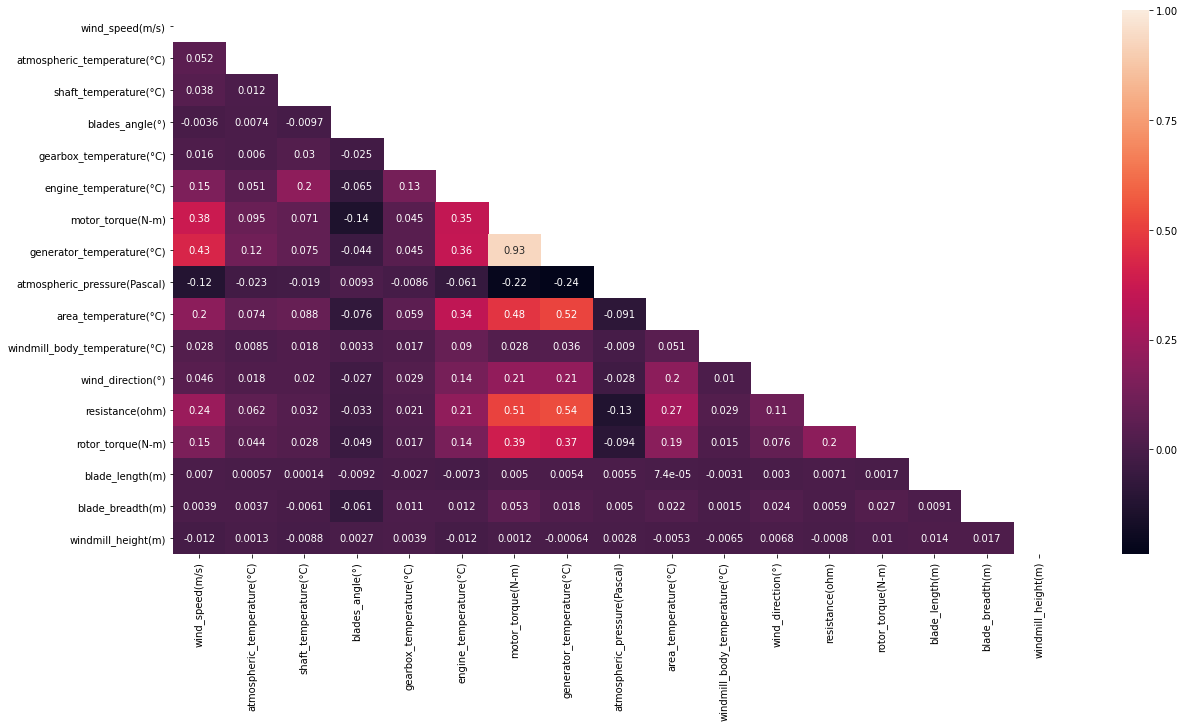

In [10]:
corr = train_noLabel.corr()
plt.figure(figsize=(20,10))
mask = np.zeros_like(corr,dtype=np.bool)
# to_drop = [column for column in mask.columns if any(mask[column] > 0.95)]
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

**For the model to be stable enough, we drop highly correlated features. <br>
So,
"resistance(ohm)" , 'area_temperature(°C)' and "motor_torque(N-m)" are highly correlated, so one will be dropped from dataset.**

In [12]:
to_drop

['generator_temperature(°C)', 'area_temperature(°C)', 'resistance(ohm)']

In [13]:
train_df_high_corr_fixed.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),atmospheric_pressure(Pascal),windmill_body_temperature(°C),wind_direction(°),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
count,27927.000000,24750.000000,28198.000000,27984.000000,28199.000000,28188.000000,28176.000000,2.549300e+04,25837.000000,23097.000000,27628.000000,23107.000000,28200.000000,27657.000000,27993.000000
mean,69.037071,0.383727,40.085387,-9.654038,41.027755,42.614239,1710.819803,5.318506e+04,20.799761,306.888883,25.849894,2.254034,0.397249,25.887052,6.130529
std,76.275645,44.278534,27.204430,47.918161,43.663605,6.124546,827.205537,1.875036e+05,54.356431,134.055900,32.423943,11.275602,0.061158,7.773609,2.697520
min,-496.211029,-99.000000,-99.000000,-146.259543,-244.974098,3.167151,500.000000,-1.188624e+06,-999.000000,0.000000,-136.732217,-99.000000,0.200111,-30.295253,0.962305
25%,20.883502,7.948900,41.633238,-1.197652,40.557952,41.911365,870.340239,1.679492e+04,40.448386,238.627752,13.722808,2.544859,0.347445,24.447658,4.059505
50%,93.302129,16.102410,43.686082,-0.495608,43.221735,43.525297,2031.849540,1.819113e+04,42.786832,271.427656,32.977192,3.453333,0.398591,25.957739,5.764710
75%,95.268058,23.687285,45.673685,5.495030,45.879425,45.174246,2462.585729,1.181133e+05,44.494543,404.153517,41.550520,4.357862,0.449354,27.477854,7.947195
max,601.455670,80.217444,169.820455,165.932123,999.000000,50.000000,3000.000000,1.272552e+06,323.000000,569.966479,236.883264,18.209800,0.499975,78.351335,20.175358


In [14]:
labels

array([ 6.76652069,  5.96627481,  2.87434197, ..., 11.09659923,
        9.37323928,  2.86034199])

**Checking Missing Values in the DataSet**

In [15]:
train_df_high_corr_fixed.isnull().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
atmospheric_pressure(Pascal)      2707
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

In [16]:
# test.isnull().sum()

<AxesSubplot:>

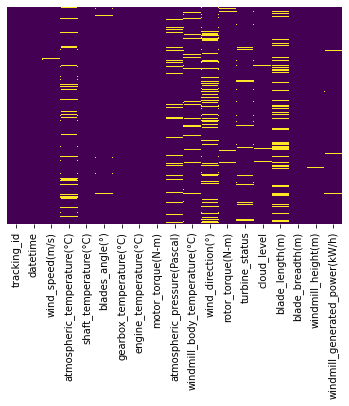

In [17]:
sns.heatmap(train_df_high_corr_fixed.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [18]:
# sns.heatmap(test.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

### Dealing with the Missing Values

**Replacing the missing values by the mean**

In [19]:

train['blade_length(m)'].fillna(train['blade_length(m)'].mean(),inplace=True)
train['atmospheric_temperature(°C)'].fillna(train['atmospheric_temperature(°C)'].mean(),inplace=True)
train['atmospheric_pressure(Pascal)'].fillna(train['atmospheric_pressure(Pascal)'].mean(),inplace=True)
train['wind_direction(°)'].fillna(train['wind_direction(°)'].mean(),inplace=True)
# test['wind_direction(°)'].fillna(test['wind_direction(°)'].mean(),inplace=True)

Removing rows with nan value

In [24]:
train.dropna(how='any',axis=0,inplace=True)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22479 entries, 2 to 28199
Data columns (total 22 columns):
tracking_id                       22479 non-null object
datetime                          22479 non-null object
wind_speed(m/s)                   22479 non-null float64
atmospheric_temperature(°C)       22479 non-null float64
shaft_temperature(°C)             22479 non-null float64
blades_angle(°)                   22479 non-null float64
gearbox_temperature(°C)           22479 non-null float64
engine_temperature(°C)            22479 non-null float64
motor_torque(N-m)                 22479 non-null float64
generator_temperature(°C)         22479 non-null float64
atmospheric_pressure(Pascal)      22479 non-null float64
area_temperature(°C)              22479 non-null float64
windmill_body_temperature(°C)     22479 non-null float64
wind_direction(°)                 22479 non-null float64
resistance(ohm)                   22479 non-null float64
rotor_torque(N-m)                 2247

In [26]:
# test.info()

**Since "turbine_status" and "cloud_level" are categorical,<br>
So, we use Dummy Variable encoding for "turbine_status" and ordinally encode the "cloud_level"**

In [30]:
train['cloud_level'].replace(['Extremely Low', 'Low', 'Medium'],[0, 1, 2],inplace=True)

In [31]:
train['turbine_status'].value_counts()

B2     1670
A      1660
BCB    1643
AAA    1638
BB     1628
D      1626
B      1612
ABC    1591
A2     1587
BA     1578
AB     1576
BD     1568
AC     1555
BBB    1547
Name: turbine_status, dtype: int64

In [40]:
dummy = ['turbine_status']
train_dummy = pd.get_dummies(train[dummy])

In [41]:
train_dummy

,turbine_status_A,turbine_status_A2,turbine_status_AAA,turbine_status_AB,turbine_status_ABC,turbine_status_AC,turbine_status_B,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,0,0,0,0,0,0,0,0,0,1,0,0,0,0
28196,0,0,0,0,0,0,0,0,0,1,0,0,0,0
28197,0,0,0,0,0,0,0,0,0,0,0,0,0,1
28198,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
train = pd.concat([train,train_dummy],axis=1)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22479 entries, 2 to 28199
Data columns (total 36 columns):
tracking_id                       22479 non-null object
datetime                          22479 non-null object
wind_speed(m/s)                   22479 non-null float64
atmospheric_temperature(°C)       22479 non-null float64
shaft_temperature(°C)             22479 non-null float64
blades_angle(°)                   22479 non-null float64
gearbox_temperature(°C)           22479 non-null float64
engine_temperature(°C)            22479 non-null float64
motor_torque(N-m)                 22479 non-null float64
generator_temperature(°C)         22479 non-null float64
atmospheric_pressure(Pascal)      22479 non-null float64
area_temperature(°C)              22479 non-null float64
windmill_body_temperature(°C)     22479 non-null float64
wind_direction(°)                 22479 non-null float64
resistance(ohm)                   22479 non-null float64
rotor_torque(N-m)                 2247

#### Converting the feature "datetime" into pandas datetime format

In [36]:
train["datetime"] = pd.to_datetime(train["datetime"])

train['dmonth'] = train['datetime'].dt.month
train['dday'] = train['datetime'].dt.day
train['ddayofweek'] = train['datetime'].dt.dayofweek

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22479 entries, 2 to 28199
Data columns (total 39 columns):
tracking_id                       22479 non-null object
datetime                          22479 non-null datetime64[ns]
wind_speed(m/s)                   22479 non-null float64
atmospheric_temperature(°C)       22479 non-null float64
shaft_temperature(°C)             22479 non-null float64
blades_angle(°)                   22479 non-null float64
gearbox_temperature(°C)           22479 non-null float64
engine_temperature(°C)            22479 non-null float64
motor_torque(N-m)                 22479 non-null float64
generator_temperature(°C)         22479 non-null float64
atmospheric_pressure(Pascal)      22479 non-null float64
area_temperature(°C)              22479 non-null float64
windmill_body_temperature(°C)     22479 non-null float64
wind_direction(°)                 22479 non-null float64
resistance(ohm)                   22479 non-null float64
rotor_torque(N-m)             

### Data Modelling

In [46]:
X=train.drop(['tracking_id','datetime','windmill_generated_power(kW/h)','turbine_status'],axis=1)
y = train['windmill_generated_power(kW/h)']

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)
# Create a StandardScater model and fit it to the training data

from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_val_scaled = X_scaler.transform(X_val)
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train_scaled, y_train)

In [73]:
selector.estimator_.coef_

array([[-3.11455519,  9.93031256, -7.63172205,  2.24671847,  6.43629322]])

Optimal number of features : 5
Best features : Index(['wind_speed(m/s)', 'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)'],
      dtype='object')
Original features : Index(['wind_speed(m/s)', 'atmospheric_temperature(°C)',
       'shaft_temperature(°C)', 'blades_angle(°)', 'gearbox_temperature(°C)',
       'engine_temperature(°C)', 'motor_torque(N-m)',
       'generator_temperature(°C)', 'atmospheric_pressure(Pascal)',
       'area_temperature(°C)', 'windmill_body_temperature(°C)',
       'wind_direction(°)', 'resistance(ohm)', 'rotor_torque(N-m)',
       'cloud_level', 'blade_length(m)', 'blade_breadth(m)',
       'windmill_height(m)', 'turbine_status_A', 'turbine_status_A2',
       'turbine_status_AAA', 'turbine_status_AB', 'turbine_status_ABC',
       'turbine_status_AC', 'turbine_status_B', 'turbine_status_B2',
       'turbine_status_BA', 'turbine_status_BB', 'turbine_status_BBB',
       'turbine_status_BCB', 'turbine_s

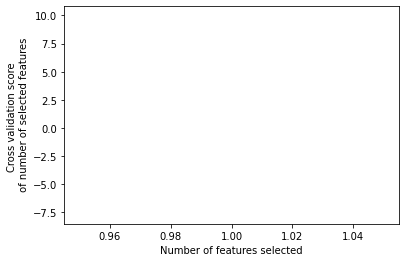

In [75]:
print('Optimal number of features :', selector.n_features_)
print('Best features :', X.columns[selector.support_])
print('Original features :', X.columns)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
plt.plot(range(1, len(selector.estimator_.coef_) + 1), selector.estimator_.coef_)
plt.show()

In [78]:
dfcolumns = X.columns[selector.support_]
dfcolumns

Index(['wind_speed(m/s)', 'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)'],
      dtype='object')

In [80]:
X_selected=X[dfcolumns]

In [81]:
print(X_selected.shape, y.shape)

(22479, 5) (22479,)


**Splitting the dataSet**

### Random Forest Regression

In [83]:
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, random_state=0)
# Create a StandardScater model and fit it to the training data

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_val_scaled = X_scaler.transform(X_val)

In [84]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators=200, n_jobs=1, oob_score=True, random_state=42)
regressor_rf.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=1, oob_score=True,
                      random_state=42)

### Testing the model on the test dataSet and creating the submission file

In [85]:
y_train_pred_rf = regressor_rf.predict(X_train_scaled)
y_test_pred_rf = regressor_rf.predict(X_val_scaled)

In [86]:
print(r2_score(y_true=y_train,y_pred=y_train_pred_rf))
print(r2_score(y_true=y_val,y_pred=y_test_pred_rf))

0.9862007713304282
0.8984633615585828


### Save model

In [ ]:
import pickle
pickle.dump(regressor_rf, open('wt_model', 'wb'))

//reference: https://www.kaggle.com/emnikkhil/predicting-the-power-produced-by-the-windmills/data